In [2]:
! git clone https://github.com/garethgeorge/pulse2percept.git

fatal: destination path 'pulse2percept' already exists and is not an empty directory.


In [3]:
! pip uninstall pulse2percept -y
! cd pulse2percept && pip install -r requirements.txt && pip install -r requirements-dev.txt && pip install -e .

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Found existing installation: pulse2percept 0.6.0.dev0
Uninstalling pulse2percept-0.6.0.dev0:
  Successfully uninstalled pulse2percept-0.6.0.dev0
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Obtaining file:///home/jovyan/work/pulse2percept
  Running setup.py develop for pulse2percept


In [4]:
from prima import * 
%matplotlib inline 
import matplotlib.pyplot as plt 

# Plot Basic Layout for Prima Implant

[[0. 0. ... 0. 0.]
 [0. 0. ... 0. 0.]
 ...
 [0. 0. ... 0. 0.]
 [0. 0. ... 0. 0.]]
(124, 164)


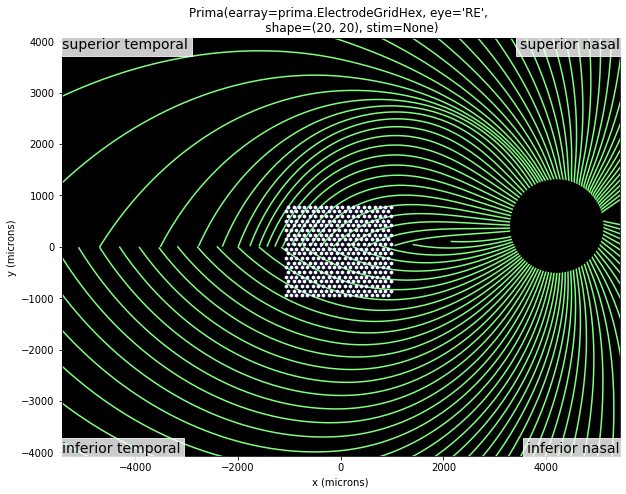

In [137]:
implant = Prima(x=-50, y=50, rot=np.deg2rad(0))
plot_implant_on_axon_map(
    implant, annotate_implant=False, marker_style='hw')
implant.stim = 10 * np.ones(400)
percept = model.predict_percept(implant)
print(percept)
print(percept.shape)

## Defining Argus, Prima, Alpha models

In [10]:
import numpy as np
from pulse2percept.implants import *
from pulse2percept.models import ScoreboardModel
from prima import Prima

In [7]:
model = ScoreboardModel(rho=100)
model.engine = 'serial'
model.build()

ScoreboardModel(engine='serial', grid_type='rectangular', 
                n_jobs=-1, rho=100, scheduler='threading', 
                thresh_percept=0.6065306597126334, 
                verbose=True, xrange=(-20, 20), 
                xystep=0.25, yrange=(-15, 15))

In [8]:
implant_prima = Prima()
implant_prima.stim = 10 * np.ones(400)
percept_prima = model.predict_percept(implant_prima)

In [ ]:
implant_argusii = ArgusII()
implant_argusii.stim = np.ones(60)
percept_argusii = model.predict_percept(implant_argusii)

## Experimenting with PCA


In [11]:
#use PCA to sample the N-dimensional image space, estimate how many effective electrodes we have, use PCA to estimate the effective nmber of electrodes
#tweak rho and lambda to modify the dimensionality 

In [47]:
!pip install Pillow
!pip install Pandas
!pip install sklearn
#https://shankarmsy.github.io/posts/pca-sklearn.html
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
# Useful PCA done on images: https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 7.0 MB 3.5 MB/s eta 0:00:01     |█▏                              | 256 kB 2.4 MB/s eta 0:00:03     |███████████████████▍            | 4.3 MB 3.5 MB/s eta 0:00:01     |██████████████████████████████  | 6.6 MB 3.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=4667d25519c03cc6adf3871499757a466b01904b46bd7e1ed7b4c534e2a21a0e
  Stored in directory: 

In [168]:
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import *

#reading from pickle and putting into objects
# objects = []
# with (open("data/ArgusII_percepts.pickle", "rb")) as openfile:
with (open("data/ArgusII_percepts.pickle", "rb")) as openfile_argusii:
    objects_argusii = pickle.load(openfile_argusii)

with (open("data/Prima20x20_percepts.pickle", "rb")) as openfile_prima:
    objects_prima = pickle.load(openfile_prima)
#     while True:
#         try:
#             objects.append(pickle.load(openfile))
#         except EOFError:
#             break


In [169]:
def do_pca(objects):
    #read one of the images to make sure data downloaded

    plt.imshow(objects[0],cmap="gray")
    print(objects[0].shape)

    # put all images in dataframe and just print 10 rows of dataframe
    # from glob import iglob
    electodes = pd.DataFrame([])
    # for path in iglob(‘*/*.pgm’):
    for idx,object in enumerate(objects):
    #  img=imread(object)
     electode = pd.Series(object.flatten(),name=idx)
     electodes = electodes.append(electode)

    fig, axes = plt.subplots(6,10,figsize=(20,20),
     subplot_kw={'xticks':[], 'yticks':[]},
     gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
     ax.imshow(electodes.iloc[i].values.reshape(164,124),cmap="gray")

    #doing the PCA! ! !   !!! ! !! 
    
    # electodes = StandardScaler().fit_transform(electodes)
    #Standardizing the data since PCA's output is influenced based on the scale of the features of the data.
    #each feature of  data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.
    electodes = normalize(electodes)
    #n_components=0.95 means it will return the Eigenvectors that have the 95% of the variation in the dataset
    electodes_pca = PCA(0.95)
    electodes_pca.fit(electodes)
    components = electodes_pca.transform(electodes)
    projected = electodes_pca.inverse_transform(components)
    print( "pca components shape: ", components.shape)
    print( "original shape: ", projected.shape)

    print("plotting 10 components")
    fig, axes = plt.subplots(2,10,figsize=(9,3),
     subplot_kw={'xticks':[], 'yticks':[]},
     gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
     ax.imshow(electodes_pca.components_[i].reshape(164,124),cmap="gray")
    print('Components:\n ', electodes_pca.components_)
    print (np.sum(electodes_pca.explained_variance_ratio_))

    #With these Eigenvectors it is possible to redraw any of the electrodes on the dataset 
    #by executing transform of the PCA object to get the Eigenvectors out, 
    #and then inverse_transform on the Eigenvectors to get all the original images:
    print("trying to create original images using reduced dimensions")
    fig, axes = plt.subplots(6,10,figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]},
                gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
        ax.imshow(projected[i].reshape(164,124),cmap="gray")

PCA for Argus Implant

(124, 164)
pca components shape:  (60, 46)
original shape:  (60, 20336)
plotting 10 components
Components:
  [[ 1.45e-016  1.63e-016 ... -2.63e-127 -4.71e-129]
 [ 2.30e-016 -3.85e-017 ... -1.97e-127 -3.54e-129]
 ...
 [-6.32e-017  1.99e-017 ... -1.13e-128 -1.93e-130]
 [ 2.20e-016 -1.92e-016 ...  1.56e-128  2.79e-130]]
0.9539971285255394
trying to create original images using reduced dimensions


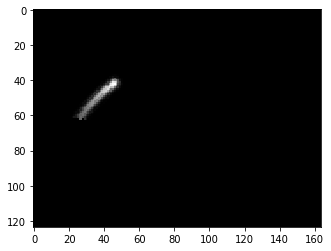

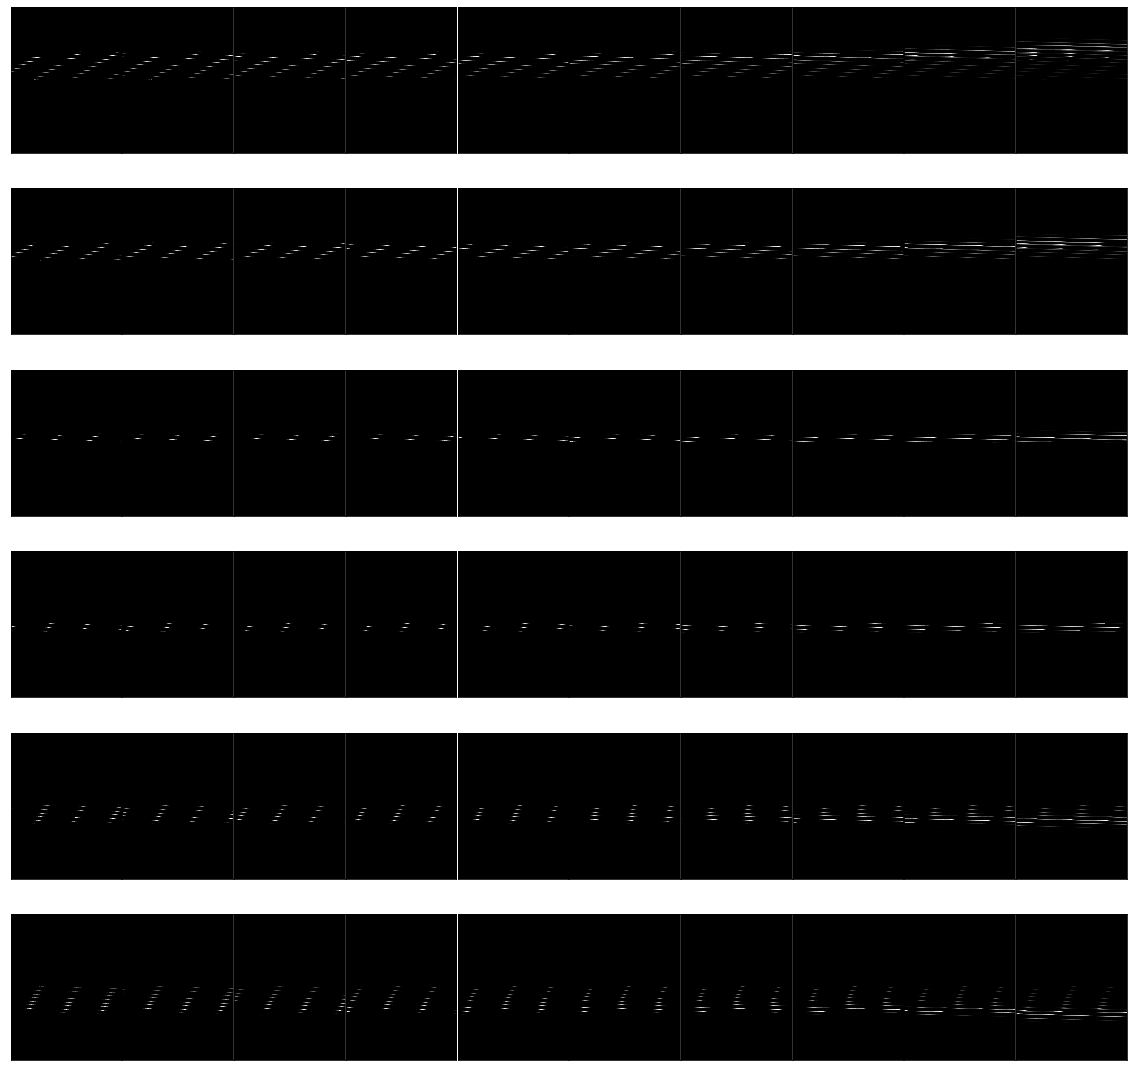

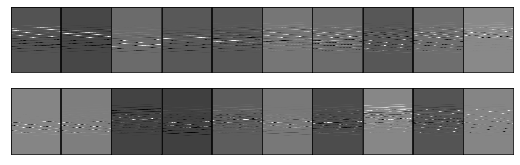

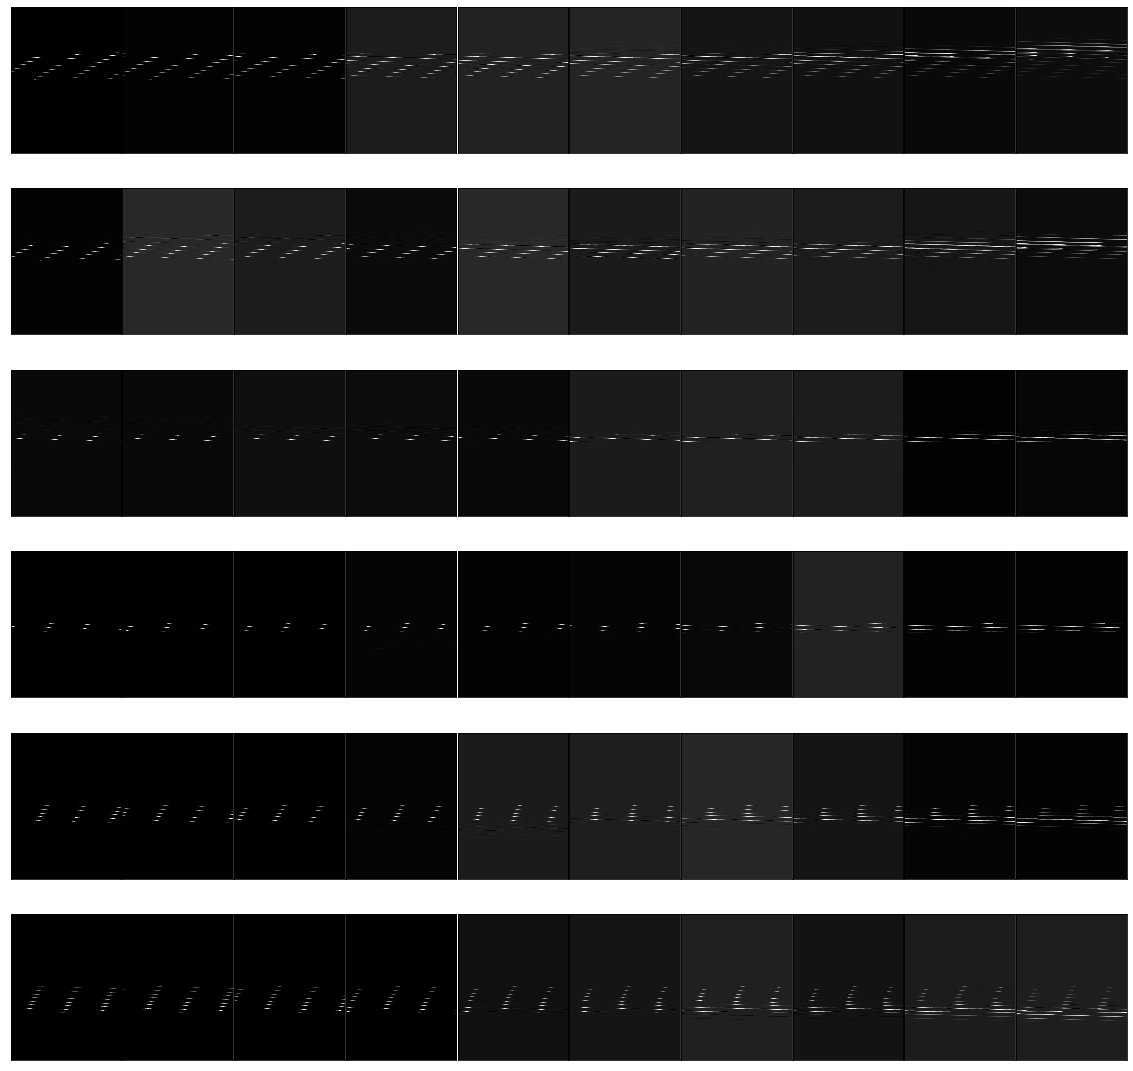

In [170]:
do_pca(objects_argusii)

PCA for Prima Implant

(124, 164)
[0. 0. ... 0. 0.]


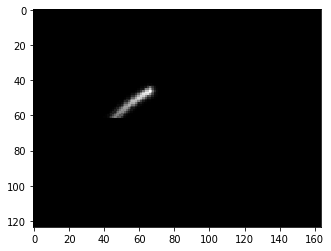

In [102]:
plt.imshow(objects_prima[0],cmap="gray")
print(objects_prima[0].shape)
print(objects_prima[0][0])

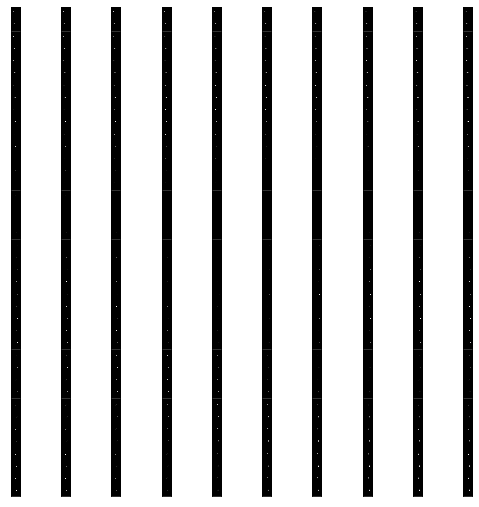

In [160]:
# put all images in dataframe and just print 10 rows of dataframe
# from glob import iglob
electodes = pd.DataFrame([])
# for path in iglob(‘*/*.pgm’):
for idx,object in enumerate(objects_prima):
#  img=imread(object)
 electode = pd.Series(object.flatten(),name=idx)
 electodes = electodes.append(electode)
 
fig, axes = plt.subplots(40,10,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(electodes.iloc[i].values.reshape(164,124),cmap="gray")

pca components shape:  (400, 49)
original shape:  (400, 20336)
Components:
  [[ 6.67e-018  1.55e-017 ... -1.35e-308 -5.02e-311]
 [ 7.28e-018 -1.16e-016 ... -8.44e-309 -3.13e-311]
 ...
 [ 7.49e-017  5.19e-016 ... -1.39e-310 -5.23e-313]
 [ 9.29e-017  5.01e-016 ... -9.17e-308 -3.40e-310]]
0.9504813980294404


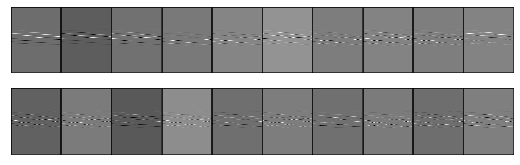

In [157]:
#doing the PCA! ! !   !!! ! !! 
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
# electodes = StandardScaler().fit_transform(electodes)
#Standardizing the data since PCA's output is influenced based on the scale of the features of the data.
#each feature of  data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.
electodes = normalize(electodes)
#n_components=0.95 means it will return the Eigenvectors that have the 95% of the variation in the dataset
electodes_pca = PCA(0.95)
electodes_pca.fit(electodes)
components = electodes_pca.transform(electodes)
projected = electodes_pca.inverse_transform(components)
print( "pca components shape: ", components.shape)
print( "original shape: ", projected.shape)

fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(electodes_pca.components_[i].reshape(164,124),cmap="gray")
print('Components:\n ', electodes_pca.components_)
print (np.sum(electodes_pca.explained_variance_ratio_))

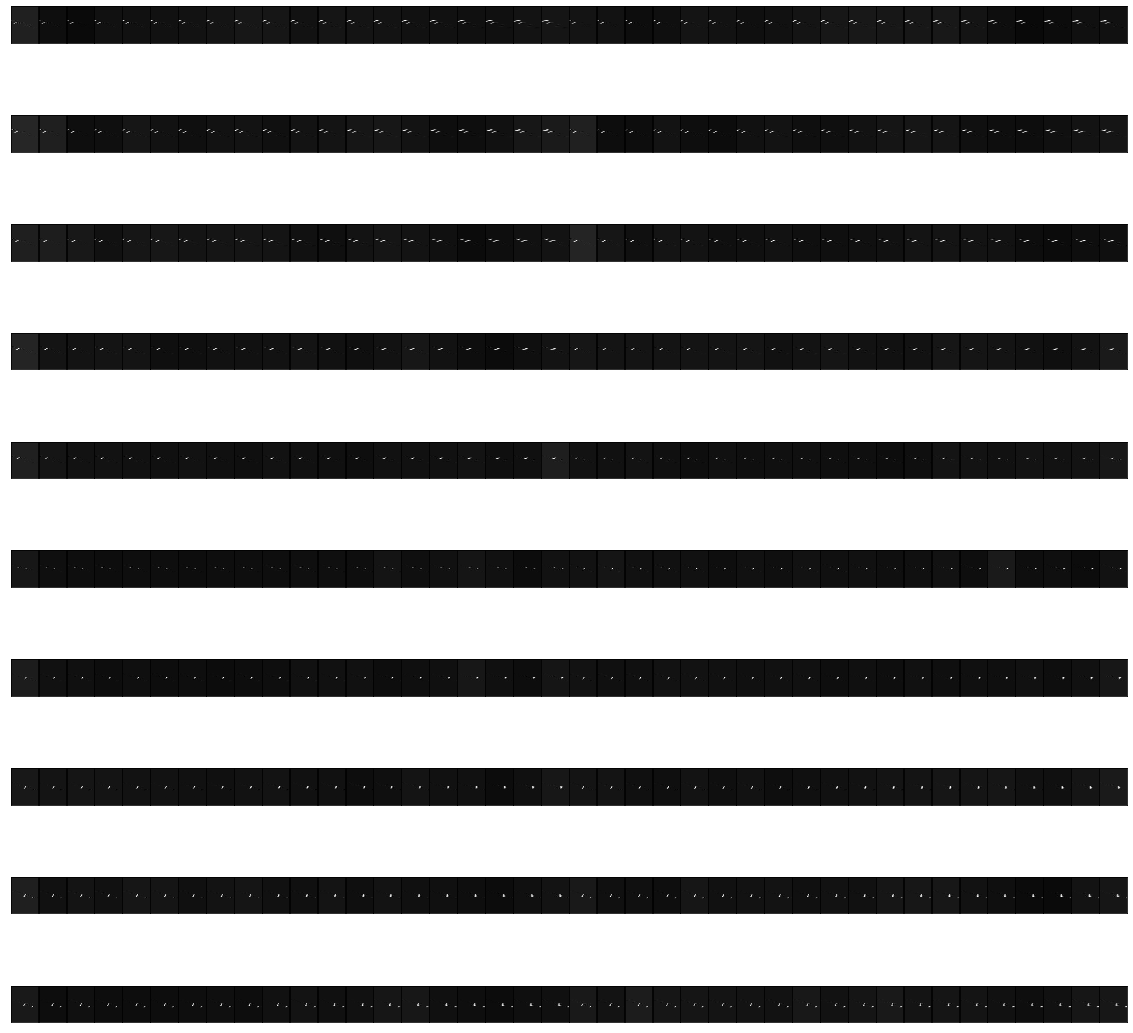

In [147]:
#With these Eigenvectors it is possible to redraw any of the electrodes on the dataset 
#by executing transform of the PCA object to get the Eigenvectors out, 
#and then inverse_transform on the Eigenvectors to get all the original images:
fig, axes = plt.subplots(10,40,figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(164,124),cmap="gray")


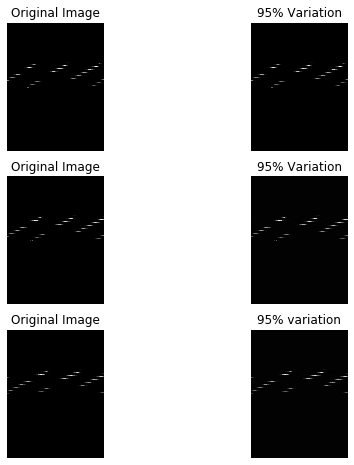

In [155]:
for i in range(0,electodes.shape[0]):
    electodes[i,] = electodes[i,].T
    projected[i,] = projected[i,].T
fig4, axarr = plt.subplots(3,2,figsize=(8,8))
axarr[0,0].imshow(electodes[0,].reshape(164,124),cmap='gray')
axarr[0,0].set_title('Original Image')
axarr[0,0].axis('off')
axarr[0,1].imshow(projected[0,].reshape(164,124),cmap='gray')
axarr[0,1].set_title('95% Variation')
axarr[0,1].axis('off')
axarr[1,0].imshow(electodes[1,].reshape(164,124),cmap='gray')
axarr[1,0].set_title('Original Image')
axarr[1,0].axis('off')
axarr[1,1].imshow(projected[1,].reshape(164,124),cmap='gray')
axarr[1,1].set_title('95% Variation')
axarr[1,1].axis('off')
axarr[2,0].imshow(electodes[2,].reshape(164,124),cmap='gray')
axarr[2,0].set_title('Original Image')
axarr[2,0].axis('off')
axarr[2,1].imshow(projected[2,].reshape(164,124),cmap='gray')
axarr[2,1].set_title('95% variation')
axarr[2,1].axis('off')
plt.show()